# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.995073e+01     6.185296e+00
 * time: 0.004667997360229492
     1     2.829145e+01     5.718072e+00
 * time: 0.014100074768066406
     2     2.520694e+01     1.009927e+01
 * time: 0.037618160247802734
     3     1.505375e+01     2.727796e+00
 * time: 0.06623601913452148
     4     1.259090e+01     1.235892e+00
 * time: 0.0903780460357666
     5     1.128009e+01     1.052724e+00
 * time: 0.11333513259887695
     6     1.065980e+01     1.832044e+00
 * time: 0.13078999519348145
     7     1.011480e+01     1.419524e+00
 * time: 0.14831805229187012
     8     9.714084e+00     8.600703e-01
 * time: 0.16604304313659668
     9     9.487957e+00     6.742980e-01
 * time: 0.1842360496520996
    10     9.340072e+00     7.378368e-01
 * time: 0.20216012001037598
    11     9.258268e+00     4.532908e-01
 * time: 0.21978116035461426
    12     9.199109e+00     3.060812e-01
 * time: 0.23738503456115723
    13     9.164333e+00     2.853520e-01
 * time

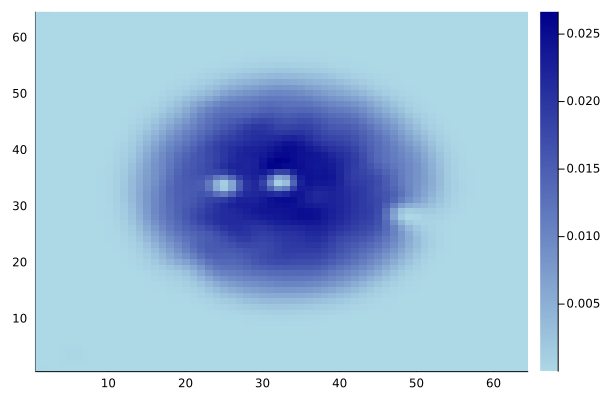

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)